In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
df = pd.read_csv("/content/diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
Pedigree,float64
Age,int64
Outcome,int64


In [6]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
Pedigree,0
Age,0
Outcome,0


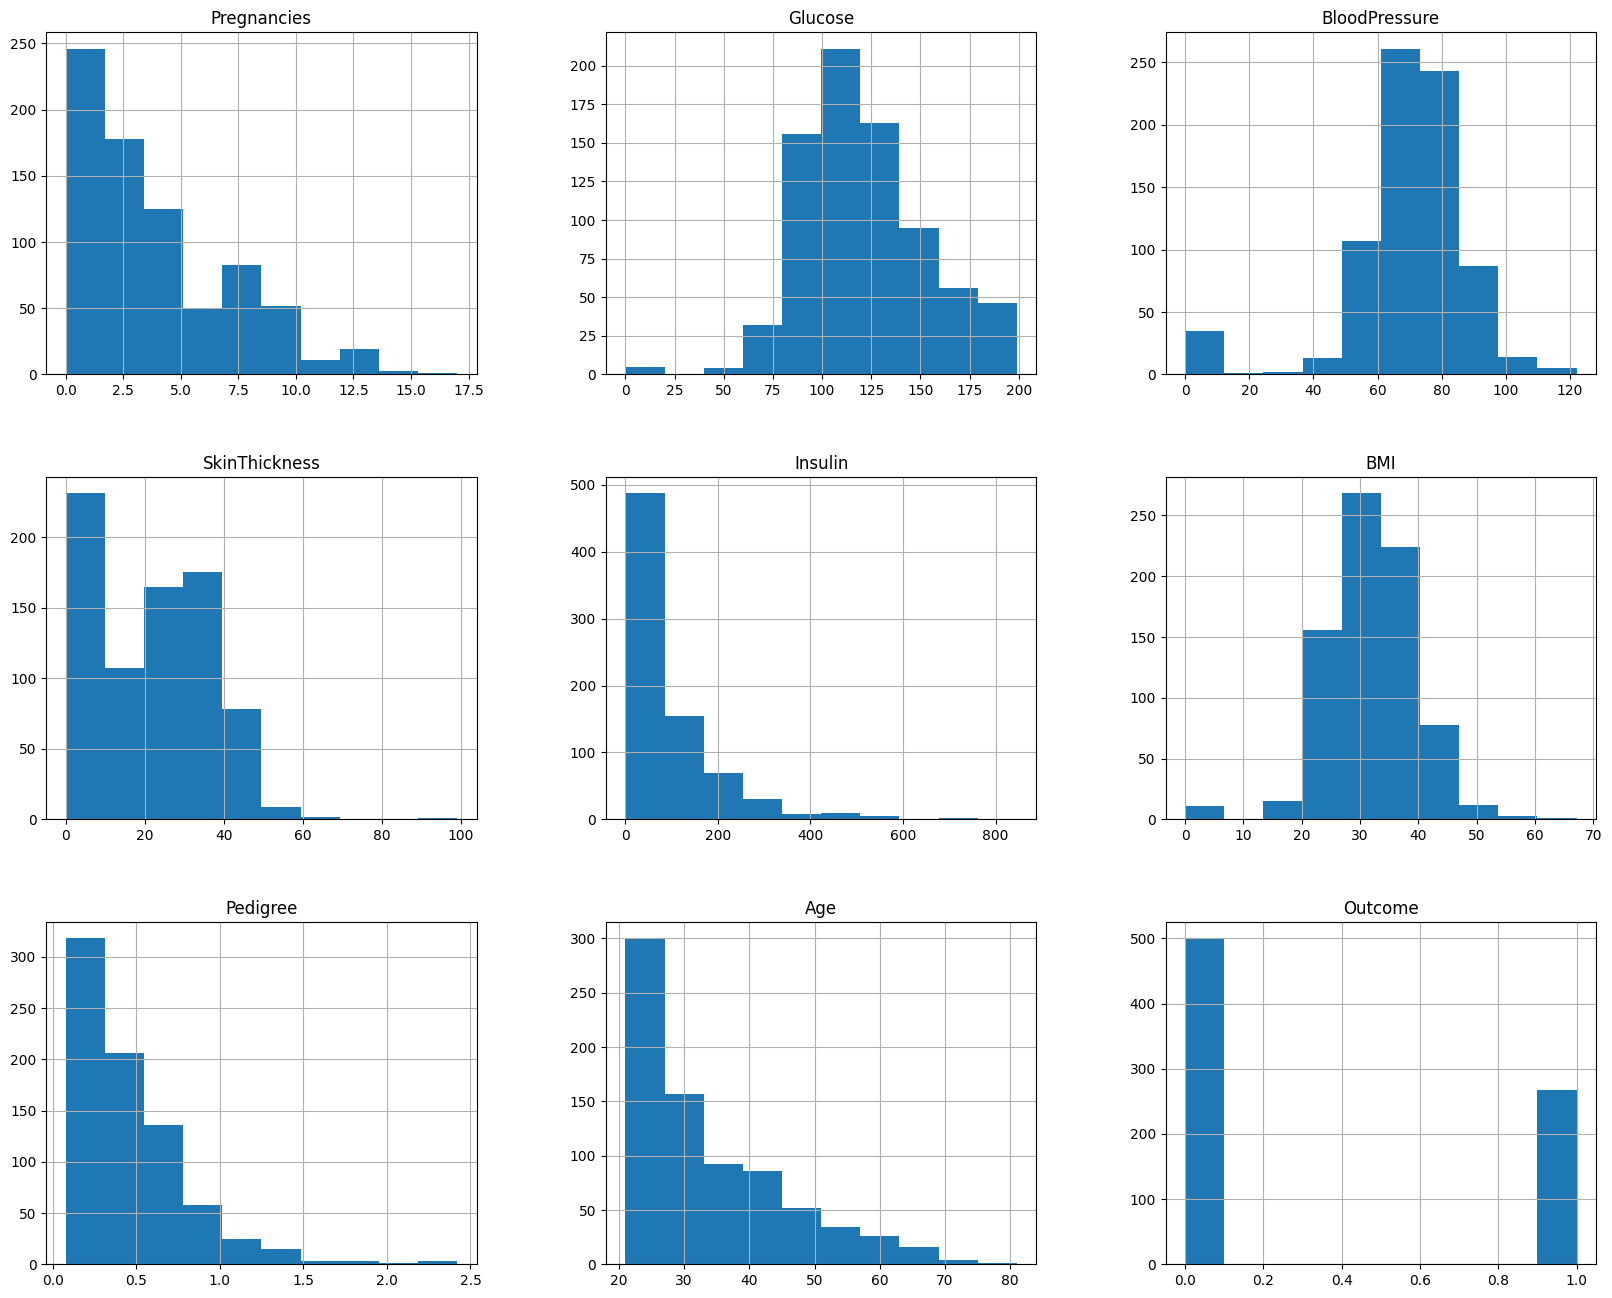

In [8]:
hist = df.hist(figsize=(20,16))

In [9]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier()

In [13]:
y_pred = model.predict(X_test)

print("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  0.7532467532467533


In [14]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[85 17]
 [21 31]]


In [15]:
print("Classification Report : \n", classification_report(y_test,y_pred))

Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.83      0.82       102
           1       0.65      0.60      0.62        52

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154

